In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Prerequisites

For this tutorial I reccomend you create new conda anvironment
```bash
conda create -n edu python=3.9 jupyter matplotlib
```

```bash
conda activate edu
```

## Install OpenMM

```bash 
! pip install autopep8
```

```bash
! pip install opencv-python
```

```bash
! pip install -U openmim
! mim install mmcv-full
```

## Install MMSegmentation

```bash
! git clone https://github.com/open-mmlab/mmsegmentation.git
! cd mmsegmentation
! pip install -v -e .
# "-v" means verbose, or more output
# "-e" means installing a project in editable mode,
# thus any local modifications made to the code will take effect without reinstallation.
```

```bash
! pip install mmsegmentation
```

In [2]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.11.0 True
0.25.0


# Semantic segmentation

## Organize import

In [3]:
from pathlib import Path

In [4]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

#### Verify installation

In [5]:
segpath = Path('../mmsegmentation')

```bash
! mim download mmsegmentation --config pspnet_r50-d8_512x1024_40k_cityscapes --dest {segpath}
```

In [6]:
! ls {segpath}

CITATION.cff
LICENSE
MANIFEST.in
README.md
README_zh-CN.md
configs
demo
docker
docs
mmseg
mmsegmentation.egg-info
model-index.yml
pspnet_r50-d8_512x1024_40k_cityscapes.py
pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
pytest.ini
requirements
requirements.txt
resources
result.jpg
setup.cfg
setup.py
tests
tools


/home/ubuntu/git/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: ../mmsegmentation/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


/home/ubuntu/git/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


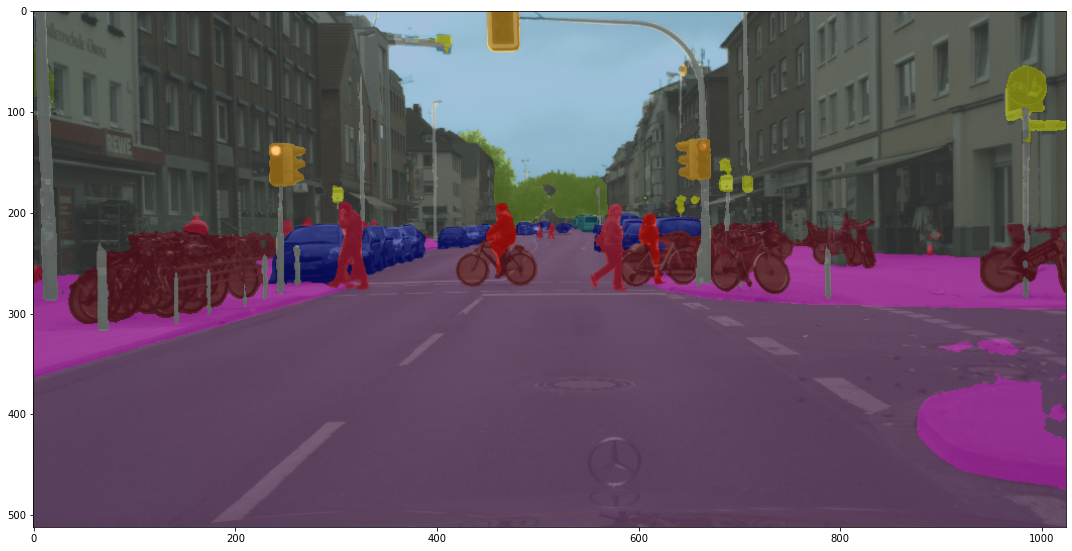

In [7]:
from mmseg.apis import inference_segmentor, init_segmentor
import mmcv

config_file = segpath / 'pspnet_r50-d8_512x1024_40k_cityscapes.py'
checkpoint_file = segpath / 'pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# build the model from a config file and a checkpoint file
model = init_segmentor(str(config_file), str(checkpoint_file), device='cuda:0')

# test a single image and show the results
img = str(segpath / 'demo' / 'demo.png') #'test.jpg'  # or img = mmcv.imread(img), which will only load it once
result = inference_segmentor(model, img)
show_result_pyplot(model, img, result, get_palette('cityscapes'))

## Download data

In [8]:
path = Path('data')
camvid = path / 'camvid'
camvid.mkdir(exist_ok = True)

In [9]:
! ls {path}

__MACOSX    geomnist_dataset  ml_intro	   probability	wheat
camvid	    hymenoptera       mnist	   queries	workshop_1
geoletters  hymenoptera_data  naive_bayes  search	workshop_2


In [10]:
if not (camvid / 'camvid_tiny.tgz').exists():
    ! wget http://files.fast.ai/data/examples/camvid_tiny.tgz -P {camvid}

In [11]:
! ls {camvid}

camvid_tiny  camvid_tiny.tgz


In [12]:
camvid_tiny = camvid / 'camvid_tiny'

In [13]:
if not camvid_tiny.exists():
    ! tar xf {camvid / 'camvid_tiny.tgz'} -C {camvid}

In [14]:
! ls {camvid_tiny}

codes.txt  images  label_colors.txt  labels  splits


In [15]:
! ls {camvid_tiny / 'images'}

0001TP_006750.png  0006R0_f03210.png  0016E5_07979.png	  Seq05VD_f00990.png
0001TP_006840.png  0006R0_f03240.png  0016E5_07995.png	  Seq05VD_f01080.png
0001TP_007500.png  0006R0_f03330.png  0016E5_07997.png	  Seq05VD_f01260.png
0001TP_007860.png  0006R0_f03450.png  0016E5_08001.png	  Seq05VD_f01320.png
0001TP_008070.png  0006R0_f03630.png  0016E5_08009.png	  Seq05VD_f01440.png
0001TP_008160.png  0006R0_f03720.png  0016E5_08057.png	  Seq05VD_f01830.png
0001TP_008400.png  0016E5_00720.png   0016E5_08085.png	  Seq05VD_f01890.png
0001TP_008580.png  0016E5_00840.png   0016E5_08089.png	  Seq05VD_f01950.png
0001TP_008670.png  0016E5_01260.png   0016E5_08093.png	  Seq05VD_f02070.png
0001TP_008700.png  0016E5_01500.png   0016E5_08101.png	  Seq05VD_f02370.png
0001TP_008760.png  0016E5_01920.png   0016E5_08125.png	  Seq05VD_f02640.png
0001TP_008940.png  0016E5_02250.png   0016E5_08137.png	  Seq05VD_f02880.png
0001TP_009000.png  0016E5_05190.png   0016E5_08141.png	  Seq05VD_f02940.png
0001TP_00915

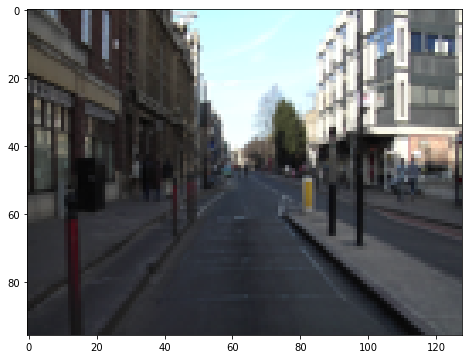

In [16]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread(camvid_tiny / 'images/' / '0016E5_07290.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [17]:
palette_path = camvid_tiny / 'label_colors.txt'

In [18]:
if not palette_path.exists():
    ! wget http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/data/label_colors.txt -P {camvid_tiny}

In [19]:
import re

In [20]:
with palette_path.open('r') as plts:
    lines = plts.readlines()
    classes = list()
    palette = list()
    for idx, line in enumerate(lines):
        cl_ln = line.strip()
        pltte = re.findall('[0-9]+', cl_ln)
        cl_nm = re.findall('[A-Z-a-z]+', cl_ln)[0]
        palette.append(pltte)
        classes.append(cl_nm)
        print(idx + 1, pltte, cl_nm)

1 ['64', '128', '64'] Animal
2 ['192', '0', '128'] Archway
3 ['0', '128', '192'] Bicyclist
4 ['0', '128', '64'] Bridge
5 ['128', '0', '0'] Building
6 ['64', '0', '128'] Car
7 ['64', '0', '192'] CartLuggagePram
8 ['192', '128', '64'] Child
9 ['192', '192', '128'] Column
10 ['64', '64', '128'] Fence
11 ['128', '0', '192'] LaneMkgsDriv
12 ['192', '0', '64'] LaneMkgsNonDriv
13 ['128', '128', '64'] Misc
14 ['192', '0', '192'] MotorcycleScooter
15 ['128', '64', '64'] OtherMoving
16 ['64', '192', '128'] ParkingBlock
17 ['64', '64', '0'] Pedestrian
18 ['128', '64', '128'] Road
19 ['128', '128', '192'] RoadShoulder
20 ['0', '0', '192'] Sidewalk
21 ['192', '128', '128'] SignSymbol
22 ['128', '128', '128'] Sky
23 ['64', '128', '192'] SUVPickupTruck
24 ['0', '0', '64'] TrafficCone
25 ['0', '64', '64'] TrafficLight
26 ['192', '64', '128'] Train
27 ['128', '128', '0'] Tree
28 ['192', '128', '192'] Truck
29 ['64', '0', '64'] Tunnel
30 ['192', '192', '0'] VegetationMisc
31 ['0', '0', '0'] Void
32 ['64

In [21]:
! ls {camvid_tiny / 'labels'}

0001TP_006750_P.png  0016E5_01500_P.png  0016E5_08550_P.png
0001TP_006840_P.png  0016E5_01920_P.png  Seq05VD_f00000_P.png
0001TP_007500_P.png  0016E5_02250_P.png  Seq05VD_f00090_P.png
0001TP_007860_P.png  0016E5_05190_P.png  Seq05VD_f00210_P.png
0001TP_008070_P.png  0016E5_05310_P.png  Seq05VD_f00420_P.png
0001TP_008160_P.png  0016E5_05730_P.png  Seq05VD_f00480_P.png
0001TP_008400_P.png  0016E5_05940_P.png  Seq05VD_f00810_P.png
0001TP_008580_P.png  0016E5_06090_P.png  Seq05VD_f00990_P.png
0001TP_008670_P.png  0016E5_06240_P.png  Seq05VD_f01080_P.png
0001TP_008700_P.png  0016E5_06300_P.png  Seq05VD_f01260_P.png
0001TP_008760_P.png  0016E5_06570_P.png  Seq05VD_f01320_P.png
0001TP_008940_P.png  0016E5_06810_P.png  Seq05VD_f01440_P.png
0001TP_009000_P.png  0016E5_06870_P.png  Seq05VD_f01830_P.png
0001TP_009150_P.png  0016E5_06990_P.png  Seq05VD_f01890_P.png
0001TP_009360_P.png  0016E5_07290_P.png  Seq05VD_f01950_P.png
0001TP_009840_P.png  0016E5_07973_P.png  Seq05VD_f02070_P.png
0001TP_009

#### Convert dataset

In [22]:
import os.path as osp

In [23]:
data_root = camvid_tiny
img_dir = 'images'
ann_dir = 'labels'

In [24]:
# split train/val set randomly
split_dir = 'splits'
mmcv.mkdir_or_exist(data_root / split_dir)
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, img_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

In [25]:
! ls {data_root / split_dir}

train.txt  val.txt


In [26]:
with (data_root / split_dir / 'train.txt').open('r') as spl:
    lines = spl.readlines()
    for line in lines:
        print(line)

Seq05VD_f02940

Seq05VD_f03090

0006R0_f03450

0001TP_010200

0016E5_00840

0001TP_009000

Seq05VD_f00990

Seq05VD_f00090

0016E5_01500

0016E5_08400

Seq05VD_f03210

0006R0_f02490

Seq05VD_f02640

0006R0_f03720

Seq05VD_f03660

0001TP_007860

0016E5_00720

0006R0_f03630

0016E5_07997

0016E5_08057

Seq05VD_f01830

0016E5_08101

0016E5_08125

Seq05VD_f00480

0016E5_08093

0016E5_06990

0006R0_f02550

0016E5_06810

Seq05VD_f04950

0016E5_07973

Seq05VD_f01320

0016E5_05310

0016E5_08340

0016E5_08009

0016E5_08155

0016E5_07979

0016E5_06300

Seq05VD_f04530

0001TP_008160

0016E5_06870

Seq05VD_f04650

0016E5_05940

0016E5_08085

0006R0_f00960

0016E5_08137

0001TP_008580

0016E5_08280

Seq05VD_f04620

Seq05VD_f02880

0001TP_008760

Seq05VD_f01260

0006R0_f03210

0001TP_008400

0001TP_007500

0016E5_05190

0001TP_009150

0016E5_08001

Seq05VD_f03060

0016E5_06240

0016E5_08141

Seq05VD_f02070

Seq05VD_f00210

0006R0_f03180

0001TP_009840

0016E5_06570

0006R0_f01710

Seq05VD_f03750

Seq

In [27]:
with (data_root / split_dir / 'val.txt').open('r') as spl:
    lines = spl.readlines()
    for line in lines:
        print(line)

0006R0_f02910

0001TP_008700

0016E5_01260

Seq05VD_f00000

0001TP_008070

0001TP_008940

0016E5_07290

0006R0_f03240

0016E5_05730

Seq05VD_f03960

0001TP_008670

Seq05VD_f02370

Seq05VD_f01080

0016E5_02250

Seq05VD_f00420

0001TP_006750

Seq05VD_f01440

0006R0_f02610

Seq05VD_f03150

0016E5_01920



#### Registar dataset

In [28]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module(force=True)
class CamvidDataset(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='_P.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None


#### Visualize dataset

In [29]:
import matplotlib.patches as mpatches
from PIL import Image
import numpy as np

In [30]:
# # Let's take a look at the segmentation map we got
# img = Image.open(data_root/ ann_dir / '0016E5_07290_P.png')
# plt.figure(figsize=(8, 6))
# im = plt.imshow(np.array(img.convert('RGB')))

# # create a patch (proxy artist) for every color 
# patches = [mpatches.Patch(color=np.array(palette[i])/255., 
#                           label=classes[i]) for i in range(32)]
# # put those patched as legend-handles into the legend
# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
#            fontsize='large')

# plt.show()

## Download and configure checkpoint

In [31]:
checkpoints = Path('checkpoints')
checkpoints.mkdir(exist_ok=True)

In [32]:
psp_city_ckp = 'pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'
psp_city_path = checkpoints / psp_city_ckp

In [33]:
if not psp_city_path.exists():
    !wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoints

In [34]:
! ls {checkpoints}

pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


## Prepare configuration

In [35]:
from mmcv import Config
from mmseg.apis import set_random_seed

In [36]:
conf_path = segpath / 'configs'

In [37]:
! ls {conf_path}

_base_	   convnext	  encnet    isanet	  psanet     swin
ann	   danet	  erfnet    knet	  pspnet     twins
apcnet	   deeplabv3	  fastfcn   mae		  resnest    unet
beit	   deeplabv3plus  fastscnn  mobilenet_v2  segformer  upernet
bisenetv1  dmnet	  fcn	    mobilenet_v3  segmenter  vit
bisenetv2  dnlnet	  gcnet     nonlocal_net  sem_fpn
ccnet	   dpt		  hrnet     ocrnet	  setr
cgnet	   emanet	  icnet     point_rend	  stdc


In [38]:
psp_config = conf_path / 'pspnet'
psp_config_city = psp_config / 'pspnet_r50-d8_512x1024_40k_cityscapes.py'

In [39]:
cfg = Config.fromfile(str(psp_config_city))

In [40]:
print(cfg.pretty_text)

norm_cfg = dict(type='SyncBN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='SyncBN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='PSPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        pool_scales=(1, 2, 3, 6),
        dropout_ratio=0.1,
        num_classes=19,
        norm_cfg=dict(type='SyncBN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0)),
    auxiliary_head=dict(
        type='FCNHead',
        in_channels=1024,
        in_index=2,
        channels=256,
        num_convs=1,
        concat_in

In [41]:
! ls {checkpoints}

pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


In [42]:
# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 8
cfg.model.auxiliary_head.num_classes = 8
cfg.model.init_cfg=dict(
    type='Pretrained', 
    checkpoint='open-mmlab://resnet50_v1c'),

# Modify dataset type and path
cfg.dataset_type = 'CamvidDataset'
cfg.data_root = str(data_root)

cfg.data.samples_per_gpu = 32
cfg.data.workers_per_gpu=8

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(320, 240), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(320, 240),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = str(checkpoints / 
                    'pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth')

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.runner.max_iters = 256
cfg.log_config.interval = 32
cfg.evaluation.interval = 128
cfg.checkpoint_config.interval = 256

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device = 'cuda'
cfg.cudnn_benchmark = True

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='PSPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        pool_scales=(1, 2, 3, 6),
        dropout_ratio=0.1,
        num_classes=8,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0)),
    auxiliary_head=dict(
        type='FCNHead',
        in_channels=1024,
        in_index=2,
        channels=256,
        num_convs=1,
        concat_input=F

In [43]:
try:
    del cfg.model.backbone.pretrained
except:
    print('cfg.model.backbone.pretrained noes not exists')

cfg.model.backbone.pretrained noes not exists


In [44]:
try:
    del cfg.model.pretrained
except:
    print('cfg.model.pretrained noes not exists')

In [45]:
cfg.model.backbone

{'type': 'ResNetV1c',
 'depth': 50,
 'num_stages': 4,
 'out_indices': (0, 1, 2, 3),
 'dilations': (1, 1, 2, 4),
 'strides': (1, 2, 1, 1),
 'norm_cfg': {'type': 'BN', 'requires_grad': True},
 'norm_eval': False,
 'style': 'pytorch',
 'contract_dilation': True}

``` bash
! cp {segpath / 'demo' / 'MMSegmentation_Tutorial.ipynb'} 'mmsegmentation_tutorial.ipynb'
```

## Train model

In [46]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

2022-06-22 10:52:48,643 - mmseg - INFO - Loaded 80 images


#### Build model

In [47]:
# Build the detector
model = build_segmentor(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

#### Run training

In [48]:
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2022-06-22 07:30:12,830 - mmseg - INFO - Loaded 20 images
2022-06-22 07:30:12,831 - mmseg - INFO - load checkpoint from local path: checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
2022-06-22 07:30:13,839 - mmseg - WARNING - The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([19, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 256, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).
2022-06-22 07:30:13,843 -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 27.3 task/s, elapsed: 1s, ETA:     0s

2022-06-22 07:33:54,106 - mmseg - INFO - per class results:
2022-06-22 07:33:54,110 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|       Animal      |  0.0  |  0.0  |
|      Archway      |  0.0  |  0.39 |
|     Bicyclist     |  7.73 | 55.68 |
|       Bridge      |  nan  |  nan  |
|      Building     | 81.37 | 92.05 |
|        Car        | 13.18 | 91.24 |
|  CartLuggagePram  |  0.0  |  0.0  |
|       Child       |  0.0  |  0.0  |
|       Column      |  0.0  |  0.0  |
|       Fence       |  0.0  |  0.0  |
|    LaneMkgsDriv   |  0.0  |  0.0  |
|  LaneMkgsNonDriv  |  0.0  |  0.0  |
|        Misc       |  0.0  |  0.0  |
| MotorcycleScooter |  nan  |  nan  |
|    OtherMoving    |  0.0  |  0.0  |
|    ParkingBlock   |  0.0  |  0.0  |
|     Pedestrian    |  0.0  |  0.0  |
|        Road       |  0.0  |  0.0  |
|    RoadShoulder   |  0.0  |  0.0  |
|      Sidewalk     |  0.0  |  0.0  |
|     SignSymbol    |  0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 20/20, 43.6 task/s, elapsed: 0s, ETA:     0s

2022-06-22 07:37:36,764 - mmseg - INFO - per class results:
2022-06-22 07:37:36,767 - mmseg - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|       Animal      |  0.0  |  0.0  |
|      Archway      |  0.0  |  0.39 |
|     Bicyclist     | 10.08 |  57.4 |
|       Bridge      |  nan  |  nan  |
|      Building     | 82.52 | 94.52 |
|        Car        |  13.1 | 89.59 |
|  CartLuggagePram  |  0.0  |  0.0  |
|       Child       |  0.0  |  0.0  |
|       Column      |  0.0  |  0.0  |
|       Fence       |  0.0  |  0.0  |
|    LaneMkgsDriv   |  0.0  |  0.0  |
|  LaneMkgsNonDriv  |  0.0  |  0.0  |
|        Misc       |  0.0  |  0.0  |
| MotorcycleScooter |  nan  |  nan  |
|    OtherMoving    |  0.0  |  0.0  |
|    ParkingBlock   |  0.0  |  0.0  |
|     Pedestrian    |  0.0  |  0.0  |
|        Road       |  0.0  |  0.0  |
|    RoadShoulder   |  0.0  |  0.0  |
|      Sidewalk     |  0.0  |  0.0  |
|     SignSymbol    |  0

## Inference on trained model

In [49]:
model

EncoderDecoder(
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [50]:
img = mmcv.imread(str(data_root / img_dir / 'Seq05VD_f01080.png'))

In [51]:
img.shape

(96, 128, 3)

In [52]:
model.cfg = cfg

<Figure size 576x432 with 0 Axes>

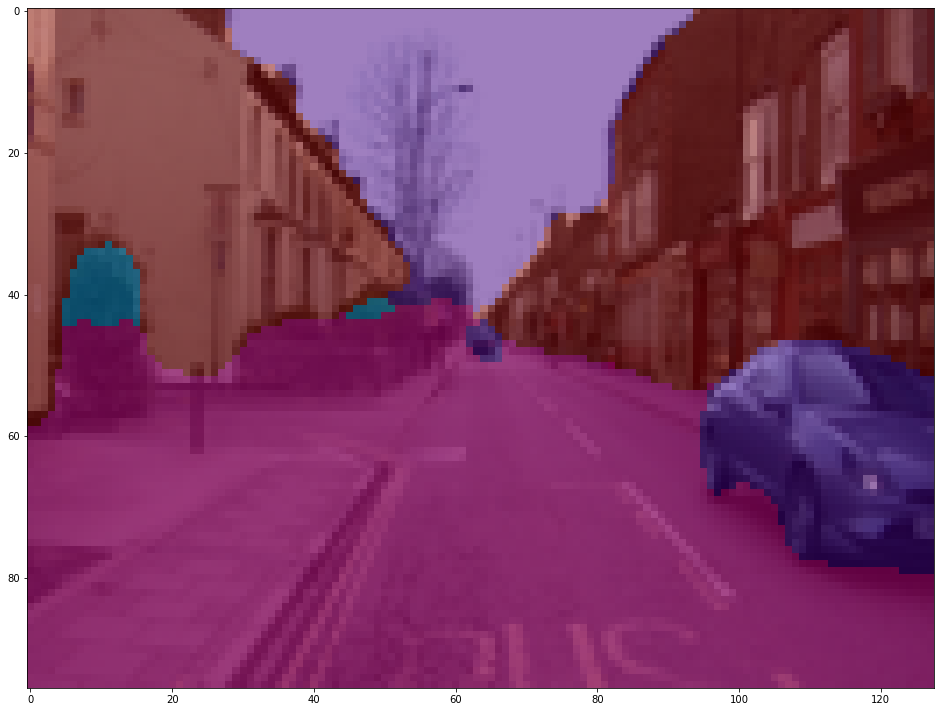

In [53]:
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)

# Object detection with MMDetection library

The library MMDetection in part of the OpenMMLab library

#### Install library

```python
pip install -U openmim
mim install mmcv-full
```

In [48]:
! ls ~/git

lattice-machines  mdrel-ssl  mmdetection  mmsegmentation  school-of-ai


```python
! git clone https://github.com/open-mmlab/mmdetection.git ../mmdetection
```

``` python
! cd ../mmdetection; pip install -U -v -e .
```

## Organize imports

In [225]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import train_detector, inference_detector, show_result_pyplot, set_random_seed
from mmdet.models import build_detector

In [226]:
from mmcv import Config

In [227]:
import mmcv
import numpy as np

from mmdet.datasets import build_dataset
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

In [228]:
import pandas as pd

In [229]:
import json
from tqdm import tqdm
import pickle
import zipfile
import os

In [230]:
from pathlib import Path

#### Verify installation

In [164]:
detpath = Path('../mmdetection')

In [191]:
det_config = detpath / 'configs'

In [192]:
frcnn_config = det_config / 'faster_rcnn' / 'faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py'

In [193]:
fcnn_checkpoints = Path('checkpoints')
fcnn_checkpoints.mkdir(exist_ok=True)

In [194]:
! ls {fcnn_checkpoints}

faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth
pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


In [195]:
fcnn_checkpoints_path = fcnn_checkpoints / 'faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth'

In [196]:
if not fcnn_checkpoints_path.exists():
    !wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth \
      -O {fcnn_checkpoints_path}

In [197]:
ls ! {checkpoints}

ls: cannot access '!': No such file or directory
checkpoints:
faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth
pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


In [200]:
! ls {det_config}

_base_		 efficientnet	      libra_rcnn	   rpn
albu_example	 empirical_attention  lvis		   sabl
atss		 fast_rcnn	      mask2former	   scnet
autoassign	 faster_rcnn	      mask_rcnn		   scratch
carafe		 fcos		      maskformer	   seesaw_loss
cascade_rcnn	 foveabox	      ms_rcnn		   selfsup_pretrain
cascade_rpn	 fpg		      nas_fcos		   simple_copy_paste
centernet	 free_anchor	      nas_fpn		   solo
centripetalnet	 fsaf		      openimages	   solov2
cityscapes	 gcnet		      paa		   sparse_rcnn
common		 gfl		      pafpn		   ssd
convnext	 ghm		      panoptic_fpn	   strong_baselines
cornernet	 gn		      pascal_voc	   swin
dcn		 gn+ws		      pisa		   timm_example
dcnv2		 grid_rcnn	      point_rend	   tood
ddod		 groie		      pvt		   tridentnet
deepfashion	 guided_anchoring     queryinst		   vfnet
deformable_detr  hrnet		      regnet		   wider_face
detectors	 htc		      reppoints		   yolact
detr		 instaboost	      res2net		   yolo
double_heads	 lad		      resnest		   yolof
dyhead		 ld		      resnet

In [201]:
! ls {frcnn_config}

../mmdetection/configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py


In [205]:
# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(frcnn_config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, str(fcnn_checkpoints_path), map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth


FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

In [206]:
# Use the detector to do inference
img = detpath / 'demo' / 'demo.jpg'
result = inference_detector(model, str(img))

/home/ubuntu/git/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


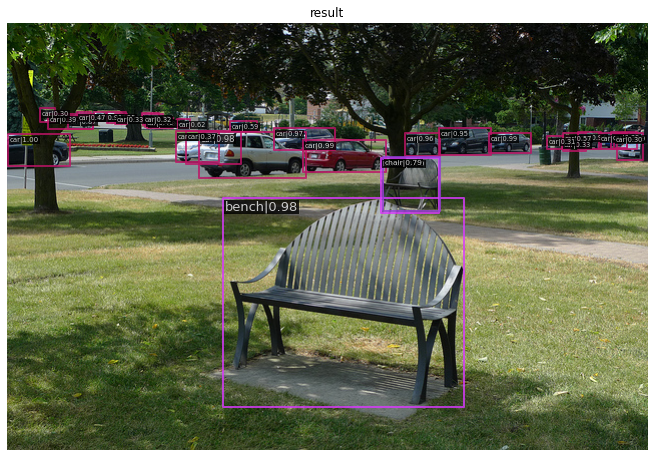

In [207]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

#### Prepare dataset

In [75]:
! pip install -U kaggle

In [77]:
Path.home()

PosixPath('/home/ubuntu')

In [78]:
path = Path.home() /'.kaggle'
path.mkdir(exist_ok=True)

In [80]:
datasets = Path('data') / 'wheat'
datasets.mkdir(exist_ok=True)

In [81]:
! ls {datasets}

global-wheat-detection.zip  sample_submission.csv  test  train	train.csv


In [82]:
wheet_path = datasets / 'global-wheat-detection.zip'
wheet_path

PosixPath('data/wheat/global-wheat-detection.zip')

In [83]:
zip_not_exists = not wheet_path.exists()

In [84]:
json_path = path / 'kaggle.json'
if zip_not_exists:
    api_token = {"username":"levants","key":"d19dc0c497539f1fe4f29fbd9bc85da3"}
    with json_path.open(mode='w') as file:
        json.dump(api_token, file)

In [85]:
json_path

PosixPath('/home/ubuntu/.kaggle/kaggle.json')

In [88]:
if zip_not_exists:
    ! chmod 600 ~/.kaggle/kaggle.json
    ! kaggle datasets list

In [89]:
if zip_not_exists:
    ! kaggle competitions download -c global-wheat-detection -p {datasets}

```python
datasets = Path('/content') / 'drive' / 'My\ Drive' / 'datasets'
! ls {datasets}
```

In [90]:
data_path = datasets

In [91]:
! ls {data_path}

global-wheat-detection.zip  sample_submission.csv  test  train	train.csv


In [92]:
csv_file_not_exists = not (data_path / 'sample_submission.csv').exists()

In [93]:
if csv_file_not_exists:
    zip_ref = zipfile.ZipFile(data_path / 'global-wheat-detection.zip', 'r')
    zip_ref.extractall(path=data_path)
    zip_ref.close()

In [95]:
! ls {data_path}

global-wheat-detection.zip  sample_submission.csv  test  train	train.csv


#### Convert dataset

In [97]:
images_path = data_path / 'train' 
csv_path = data_path / 'train.csv'

In [98]:
df = pd.read_csv(csv_path)

In [99]:
df

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1
...,...,...,...,...,...
147788,5e0747034,1024,1024,"[64.0, 619.0, 84.0, 95.0]",arvalis_2
147789,5e0747034,1024,1024,"[292.0, 549.0, 107.0, 82.0]",arvalis_2
147790,5e0747034,1024,1024,"[134.0, 228.0, 141.0, 71.0]",arvalis_2
147791,5e0747034,1024,1024,"[430.0, 13.0, 184.0, 79.0]",arvalis_2


In [100]:
class_names = df.source.unique().tolist()
classes = {class_name: idx for idx, class_name in enumerate(class_names)}
LABEL_NAMES = classes
LABEL_NAMES

{'usask_1': 0,
 'arvalis_1': 1,
 'inrae_1': 2,
 'ethz_1': 3,
 'arvalis_3': 4,
 'rres_1': 5,
 'arvalis_2': 6}

In [101]:
df.image_id.unique().shape

(3373,)

In [263]:
def create_dataset(df):
    data_infos = []
    image_df = df.image_id.unique()
    items = len(image_df)
    image_df = enumerate(image_df)
    with tqdm(image_df, total=items, desc='converting data') as prog:
        for image_id, img_name in prog:
            record = dict()
            image_df = df[df.image_id == img_name]
            record['filename'] = f'{img_name}.jpg'
            record['image_id'] = image_id
            record['height'] = int(image_df.iloc[0].height)
            record['width'] = int(image_df.iloc[0].width)
            bboxes = list()
            labels = list()
            for _, row in image_df.iterrows():
                bbox_raw = json.loads(row.bbox)
                bbox = [int(bbox_raw[0]), int(bbox_raw[1]),
                        int(bbox_raw[0] + bbox_raw[2]), int(bbox_raw[1] + bbox_raw[3])]
                bboxes.append(bbox)
                category_id=classes.get(row.source, 0)
                labels.append(category_id)
            record['ann'] = dict(
                bboxes=np.array(bboxes).astype(np.float32),
                labels=np.array(labels).astype(np.int64))
            data_infos.append(record)

    return data_infos

In [264]:
data_dicts = create_dataset(df)

converting data: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3373/3373 [00:45<00:00, 74.36it/s]


In [265]:
data_dicts[-1]['filename']

'5e0747034.jpg'

In [266]:
total_data = len(data_dicts)
split_data = total_data - (total_data// 4)

In [267]:
train_dicts = data_dicts[:split_data]
val_dicts = data_dicts[split_data:]
len(train_dicts), len(val_dicts)

(2530, 843)

In [268]:
data_pickle = data_path / 'dataset.pkl'
train_pickle = data_path / 'train.pkl'
val_pickle = data_path / 'val.pkl'

In [269]:
with data_pickle.open(mode='wb') as fp:
    pickle.dump(data_dicts, fp)

In [270]:
with train_pickle.open(mode='wb') as fp:
    pickle.dump(train_dicts, fp)

In [271]:
with val_pickle.open(mode='wb') as fp:
    pickle.dump(val_dicts, fp)

In [272]:
with data_pickle.open(mode='rb') as fp:
    dataset = pickle.load(fp)

In [273]:
with train_pickle.open(mode='rb') as fp:
    train_data = pickle.load(fp)

In [274]:
with val_pickle.open(mode='rb') as fp:
    val_data = pickle.load(fp)

In [275]:
len(train_data), len(val_data)

(2530, 843)

In [276]:
@DATASETS.register_module(force=True)
class WheatDataset(CustomDataset):

    CLASSES = list(LABEL_NAMES.keys())

    def load_annotations(self, ann_file):
        with Path(ann_file).open(mode='rb') as fp:
            data_infos = pickle.load(fp)
        
        return data_infos

    def get_ann_info(self, idx):
        return self.data_infos[idx]['ann']

## Configure model

In [277]:
cfg = Config.fromfile(str(frcnn_config))

In [278]:
data_root = str(data_path)
data_root

'data/wheat'

In [279]:
# Modify dataset type and path
cfg.dataset_type = 'WheatDataset'
cfg.data_root = data_root

cfg.data.test.type = 'WheatDataset'
cfg.data.test.data_root = data_root
cfg.data.test.ann_file = 'val.pkl'
cfg.data.test.img_prefix = 'train'

cfg.data.train.type = 'WheatDataset'
cfg.data.train.data_root = data_root
cfg.data.train.ann_file = 'train.pkl'
cfg.data.train.img_prefix = 'train'

cfg.data.val.type = 'WheatDataset'
cfg.data.val.data_root = data_root
cfg.data.val.ann_file = 'val.pkl'
cfg.data.val.img_prefix = 'train'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = len(LABEL_NAMES)
# If we need to finetune a model based on a pre-trained detector, we need to
# use load_from to set the path of checkpoints.
cfg.load_from = str(fcnn_checkpoints_path)

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.cudnn_benchmark = True
cfg.device = 'cuda'

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=False),
        norm_eval=True,
        style='caffe',
        init_cfg=dict(
            type='Pretrained',
            checkpoint='open-mmlab://detectron2/resnet50_caffe')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='Cro

## Train the model

In [280]:
# Build dataset
datasets = [build_dataset(cfg.data.train)]

In [281]:
# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

In [ ]:
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

2022-06-22 13:14:04,089 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-06-22 13:14:04,098 - mmdet - INFO - load checkpoint from local path: checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth
2022-06-22 13:14:04,219 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([8, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([8]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([28, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is

2022-06-22 13:14:34,982 - mmdet - INFO - Epoch [1][200/1265]	lr: 2.500e-03, eta: 0:38:20, time: 0.138, data_time: 0.009, memory: 2892, loss_rpn_cls: 0.0891, loss_rpn_bbox: 0.1469, loss_cls: 0.4697, acc: 82.7148, loss_bbox: 0.5752, loss: 1.2808
2022-06-22 13:14:36,406 - mmdet - INFO - Epoch [1][210/1265]	lr: 2.500e-03, eta: 0:38:11, time: 0.143, data_time: 0.010, memory: 2892, loss_rpn_cls: 0.0806, loss_rpn_bbox: 0.1562, loss_cls: 0.5787, acc: 79.7070, loss_bbox: 0.5610, loss: 1.3765
2022-06-22 13:14:37,804 - mmdet - INFO - Epoch [1][220/1265]	lr: 2.500e-03, eta: 0:38:00, time: 0.139, data_time: 0.009, memory: 2892, loss_rpn_cls: 0.0908, loss_rpn_bbox: 0.1512, loss_cls: 0.5641, acc: 79.7168, loss_bbox: 0.5793, loss: 1.3855
2022-06-22 13:14:39,244 - mmdet - INFO - Epoch [1][230/1265]	lr: 2.500e-03, eta: 0:37:53, time: 0.144, data_time: 0.009, memory: 2892, loss_rpn_cls: 0.1000, loss_rpn_bbox: 0.1648, loss_cls: 0.4969, acc: 80.7324, loss_bbox: 0.5880, loss: 1.3497
2022-06-22 13:14:40,672 

2022-06-22 13:15:24,611 - mmdet - INFO - Epoch [1][540/1265]	lr: 2.500e-03, eta: 0:36:18, time: 0.151, data_time: 0.009, memory: 2892, loss_rpn_cls: 0.0670, loss_rpn_bbox: 0.1427, loss_cls: 0.4470, acc: 82.4023, loss_bbox: 0.5162, loss: 1.1729
2022-06-22 13:15:26,127 - mmdet - INFO - Epoch [1][550/1265]	lr: 2.500e-03, eta: 0:36:17, time: 0.151, data_time: 0.010, memory: 2892, loss_rpn_cls: 0.0641, loss_rpn_bbox: 0.1565, loss_cls: 0.4152, acc: 83.2910, loss_bbox: 0.5429, loss: 1.1787
2022-06-22 13:15:27,717 - mmdet - INFO - Epoch [1][560/1265]	lr: 2.500e-03, eta: 0:36:18, time: 0.159, data_time: 0.011, memory: 2892, loss_rpn_cls: 0.0639, loss_rpn_bbox: 0.1481, loss_cls: 0.4251, acc: 82.6855, loss_bbox: 0.5193, loss: 1.1563
2022-06-22 13:15:29,258 - mmdet - INFO - Epoch [1][570/1265]	lr: 2.500e-03, eta: 0:36:18, time: 0.155, data_time: 0.010, memory: 2892, loss_rpn_cls: 0.0887, loss_rpn_bbox: 0.1430, loss_cls: 0.4181, acc: 83.6426, loss_bbox: 0.5467, loss: 1.1965
2022-06-22 13:15:30,854 

2022-06-22 13:16:14,957 - mmdet - INFO - Epoch [1][880/1265]	lr: 2.500e-03, eta: 0:35:23, time: 0.157, data_time: 0.011, memory: 2892, loss_rpn_cls: 0.0488, loss_rpn_bbox: 0.1292, loss_cls: 0.3701, acc: 84.8145, loss_bbox: 0.5481, loss: 1.0963
2022-06-22 13:16:16,564 - mmdet - INFO - Epoch [1][890/1265]	lr: 2.500e-03, eta: 0:35:24, time: 0.160, data_time: 0.010, memory: 2892, loss_rpn_cls: 0.0573, loss_rpn_bbox: 0.1438, loss_cls: 0.3826, acc: 83.0469, loss_bbox: 0.5660, loss: 1.1497
2022-06-22 13:16:18,091 - mmdet - INFO - Epoch [1][900/1265]	lr: 2.500e-03, eta: 0:35:23, time: 0.153, data_time: 0.010, memory: 2892, loss_rpn_cls: 0.0594, loss_rpn_bbox: 0.1412, loss_cls: 0.3765, acc: 84.9609, loss_bbox: 0.5182, loss: 1.0953
2022-06-22 13:16:19,581 - mmdet - INFO - Epoch [1][910/1265]	lr: 2.500e-03, eta: 0:35:21, time: 0.149, data_time: 0.010, memory: 2892, loss_rpn_cls: 0.0823, loss_rpn_bbox: 0.1439, loss_cls: 0.3777, acc: 84.4238, loss_bbox: 0.5166, loss: 1.1204
2022-06-22 13:16:21,110 

2022-06-22 13:17:06,900 - mmdet - INFO - Epoch [1][1220/1265]	lr: 2.500e-03, eta: 0:34:49, time: 0.158, data_time: 0.010, memory: 2892, loss_rpn_cls: 0.0696, loss_rpn_bbox: 0.1353, loss_cls: 0.3456, acc: 85.6445, loss_bbox: 0.5166, loss: 1.0671
2022-06-22 13:17:08,442 - mmdet - INFO - Epoch [1][1230/1265]	lr: 2.500e-03, eta: 0:34:48, time: 0.154, data_time: 0.010, memory: 2892, loss_rpn_cls: 0.0618, loss_rpn_bbox: 0.1316, loss_cls: 0.3751, acc: 84.2480, loss_bbox: 0.5357, loss: 1.1042
2022-06-22 13:17:09,975 - mmdet - INFO - Epoch [1][1240/1265]	lr: 2.500e-03, eta: 0:34:47, time: 0.155, data_time: 0.011, memory: 2892, loss_rpn_cls: 0.0561, loss_rpn_bbox: 0.1542, loss_cls: 0.3500, acc: 85.5176, loss_bbox: 0.5310, loss: 1.0913
2022-06-22 13:17:11,501 - mmdet - INFO - Epoch [1][1250/1265]	lr: 2.500e-03, eta: 0:34:46, time: 0.153, data_time: 0.009, memory: 2892, loss_rpn_cls: 0.0671, loss_rpn_bbox: 0.1315, loss_cls: 0.3890, acc: 84.6191, loss_bbox: 0.5160, loss: 1.1037
2022-06-22 13:17:12,

2022-06-22 13:17:58,895 - mmdet - INFO - Epoch [2][300/1265]	lr: 2.500e-03, eta: 0:33:54, time: 0.140, data_time: 0.009, memory: 2951, loss_rpn_cls: 0.0566, loss_rpn_bbox: 0.1258, loss_cls: 0.3291, acc: 86.4844, loss_bbox: 0.4959, loss: 1.0075
2022-06-22 13:18:00,306 - mmdet - INFO - Epoch [2][310/1265]	lr: 2.500e-03, eta: 0:33:52, time: 0.140, data_time: 0.010, memory: 2951, loss_rpn_cls: 0.0641, loss_rpn_bbox: 0.1376, loss_cls: 0.3753, acc: 84.0234, loss_bbox: 0.5119, loss: 1.0889
2022-06-22 13:18:01,757 - mmdet - INFO - Epoch [2][320/1265]	lr: 2.500e-03, eta: 0:33:50, time: 0.145, data_time: 0.011, memory: 2951, loss_rpn_cls: 0.0512, loss_rpn_bbox: 0.1257, loss_cls: 0.3422, acc: 85.6445, loss_bbox: 0.5103, loss: 1.0295
2022-06-22 13:18:03,252 - mmdet - INFO - Epoch [2][330/1265]	lr: 2.500e-03, eta: 0:33:48, time: 0.150, data_time: 0.011, memory: 2951, loss_rpn_cls: 0.0548, loss_rpn_bbox: 0.1295, loss_cls: 0.3102, acc: 86.6016, loss_bbox: 0.4906, loss: 0.9851
2022-06-22 13:18:04,670 

2022-06-22 13:18:47,701 - mmdet - INFO - Epoch [2][640/1265]	lr: 2.500e-03, eta: 0:32:49, time: 0.139, data_time: 0.009, memory: 2951, loss_rpn_cls: 0.0559, loss_rpn_bbox: 0.1305, loss_cls: 0.3193, acc: 86.5723, loss_bbox: 0.4777, loss: 0.9835
2022-06-22 13:18:49,133 - mmdet - INFO - Epoch [2][650/1265]	lr: 2.500e-03, eta: 0:32:47, time: 0.144, data_time: 0.010, memory: 2951, loss_rpn_cls: 0.0519, loss_rpn_bbox: 0.1401, loss_cls: 0.3277, acc: 85.7227, loss_bbox: 0.4956, loss: 1.0153
2022-06-22 13:18:50,541 - mmdet - INFO - Epoch [2][660/1265]	lr: 2.500e-03, eta: 0:32:45, time: 0.141, data_time: 0.009, memory: 2951, loss_rpn_cls: 0.0559, loss_rpn_bbox: 0.1299, loss_cls: 0.3590, acc: 84.8535, loss_bbox: 0.5115, loss: 1.0563
2022-06-22 13:18:51,946 - mmdet - INFO - Epoch [2][670/1265]	lr: 2.500e-03, eta: 0:32:43, time: 0.139, data_time: 0.008, memory: 2951, loss_rpn_cls: 0.0512, loss_rpn_bbox: 0.1432, loss_cls: 0.3376, acc: 85.3906, loss_bbox: 0.4869, loss: 1.0189
2022-06-22 13:18:53,390 

2022-06-22 13:19:38,724 - mmdet - INFO - Epoch [2][980/1265]	lr: 2.500e-03, eta: 0:32:02, time: 0.151, data_time: 0.010, memory: 2951, loss_rpn_cls: 0.0590, loss_rpn_bbox: 0.1393, loss_cls: 0.3316, acc: 85.4492, loss_bbox: 0.5039, loss: 1.0338
2022-06-22 13:19:40,180 - mmdet - INFO - Epoch [2][990/1265]	lr: 2.500e-03, eta: 0:32:00, time: 0.145, data_time: 0.010, memory: 2951, loss_rpn_cls: 0.0575, loss_rpn_bbox: 0.1378, loss_cls: 0.3560, acc: 84.0430, loss_bbox: 0.5396, loss: 1.0909
2022-06-22 13:19:41,606 - mmdet - INFO - Epoch [2][1000/1265]	lr: 2.500e-03, eta: 0:31:58, time: 0.144, data_time: 0.010, memory: 2951, loss_rpn_cls: 0.0643, loss_rpn_bbox: 0.1430, loss_cls: 0.3328, acc: 85.3125, loss_bbox: 0.5167, loss: 1.0568
2022-06-22 13:19:43,142 - mmdet - INFO - Epoch [2][1010/1265]	lr: 2.500e-03, eta: 0:31:57, time: 0.152, data_time: 0.010, memory: 2951, loss_rpn_cls: 0.0455, loss_rpn_bbox: 0.1456, loss_cls: 0.3133, acc: 86.5395, loss_bbox: 0.5158, loss: 1.0203
2022-06-22 13:19:44,66

2022-06-22 13:20:31,922 - mmdet - INFO - Epoch [3][60/1265]	lr: 2.500e-03, eta: 0:31:16, time: 0.145, data_time: 0.010, memory: 2951, loss_rpn_cls: 0.0630, loss_rpn_bbox: 0.1393, loss_cls: 0.3339, acc: 84.8047, loss_bbox: 0.5591, loss: 1.0954
2022-06-22 13:20:33,448 - mmdet - INFO - Epoch [3][70/1265]	lr: 2.500e-03, eta: 0:31:15, time: 0.153, data_time: 0.010, memory: 2951, loss_rpn_cls: 0.0513, loss_rpn_bbox: 0.1325, loss_cls: 0.3476, acc: 85.2539, loss_bbox: 0.5052, loss: 1.0366
2022-06-22 13:20:35,010 - mmdet - INFO - Epoch [3][80/1265]	lr: 2.500e-03, eta: 0:31:14, time: 0.156, data_time: 0.011, memory: 2951, loss_rpn_cls: 0.0465, loss_rpn_bbox: 0.1266, loss_cls: 0.3434, acc: 85.9961, loss_bbox: 0.4991, loss: 1.0157
2022-06-22 13:20:36,591 - mmdet - INFO - Epoch [3][90/1265]	lr: 2.500e-03, eta: 0:31:13, time: 0.159, data_time: 0.011, memory: 2951, loss_rpn_cls: 0.0539, loss_rpn_bbox: 0.1316, loss_cls: 0.3453, acc: 84.9902, loss_bbox: 0.5156, loss: 1.0464
2022-06-22 13:20:38,160 - mm

2022-06-22 13:21:21,677 - mmdet - INFO - Epoch [3][400/1265]	lr: 2.500e-03, eta: 0:30:22, time: 0.144, data_time: 0.010, memory: 2951, loss_rpn_cls: 0.0491, loss_rpn_bbox: 0.1301, loss_cls: 0.2963, acc: 86.9141, loss_bbox: 0.4926, loss: 0.9680
2022-06-22 13:21:23,133 - mmdet - INFO - Epoch [3][410/1265]	lr: 2.500e-03, eta: 0:30:20, time: 0.146, data_time: 0.011, memory: 2951, loss_rpn_cls: 0.0530, loss_rpn_bbox: 0.1262, loss_cls: 0.3137, acc: 86.7090, loss_bbox: 0.5040, loss: 0.9969
2022-06-22 13:21:24,565 - mmdet - INFO - Epoch [3][420/1265]	lr: 2.500e-03, eta: 0:30:18, time: 0.143, data_time: 0.010, memory: 2951, loss_rpn_cls: 0.0550, loss_rpn_bbox: 0.1269, loss_cls: 0.3207, acc: 86.2402, loss_bbox: 0.4938, loss: 0.9964
2022-06-22 13:21:26,006 - mmdet - INFO - Epoch [3][430/1265]	lr: 2.500e-03, eta: 0:30:17, time: 0.144, data_time: 0.010, memory: 2951, loss_rpn_cls: 0.0430, loss_rpn_bbox: 0.1375, loss_cls: 0.3204, acc: 85.8105, loss_bbox: 0.5179, loss: 1.0189
2022-06-22 13:21:27,426 

#### Look into the training process

In [ ]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir ./tutorial_exps

## Inference with model

In [ ]:
test_path = data_path / 'test'

In [ ]:
! {test_path}

In [ ]:
img = mmcv.imread('kitti_tiny/training/image_2/000068.jpeg')

In [ ]:
model.cfg = cfg

In [ ]:
result = inference_detector(model, img)
show_result_pyplot(model, img, result)

## Questions?